In [1]:
import librosa, librosa.display
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')

In [2]:
%%capture
fig, axs = plt.subplots(4, 1, figsize=(14, 14))

In [3]:
y, sr = librosa.load('Vowel(aa)-different-pitches.wav', sr=None, duration=20)

In [4]:
librosa.display.waveplot(y, sr, color='grey', alpha=0.7, ax=axs[0], x_axis=None)# color='tab:blue'
axs[0].set_title('Waveplot')

Text(0.5, 1.0, 'Waveplot')

In [5]:
stft = librosa.stft(y, n_fft=512)
D = librosa.amplitude_to_db(np.abs(stft))
librosa.display.specshow(D, y_axis='linear', x_axis=None, sr=sr, hop_length=512//4, fmin=librosa.note_to_hz('C3'), fmax=librosa.note_to_hz('D4'), cmap=plt.get_cmap('Greys'), ax=axs[1]) # cmap=plt.get_cmap('magma')
axs[1].set_ylim(0, 5000)
axs[1].set_title('Linear Spectrogram')
axs[1].set_ylabel('Frequency (Hz)')

Text(3.200000000000017, 0.5, 'Frequency (Hz)')

In [6]:
f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C3'), fmax=librosa.note_to_hz('D4'), sr=sr, frame_length=512)
times = librosa.times_like(f0, sr=sr)
f0[voiced_flag] = np.log2(f0[voiced_flag]/librosa.note_to_hz('C#3'))*1200
axs[2].plot(times, f0, c='black')
axs[2].set(xticklabels=[])
axs[2].set_title('Pitch Contour (in Cents)')

Text(0.5, 1.0, 'Pitch Contour (in Cents)')

In [7]:
stft = librosa.stft(y=y, n_fft=2048)
S = np.abs(stft) ** 2
chroma = librosa.feature.chroma_stft(S=S, sr=sr, norm=1, n_chroma=12)
chroma = np.roll(chroma, shift=-1, axis=0)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', hop_length=2048//4, sr=sr, fmin=librosa.note_to_hz('C3'), fmax=librosa.note_to_hz('D4'), ax=axs[3], cmap=plt.get_cmap('Greys'))
axs[3].set(yticks=[0.5, 5.5, 10.5], yticklabels=['C#', 'F#', 'B'])
for yval in [0.5, 5.5, 10.5]:
    axs[3].axhline(yval, color='white')
axs[3].set_title('Chromagram')

Text(0.5, 1.0, 'Chromagram')

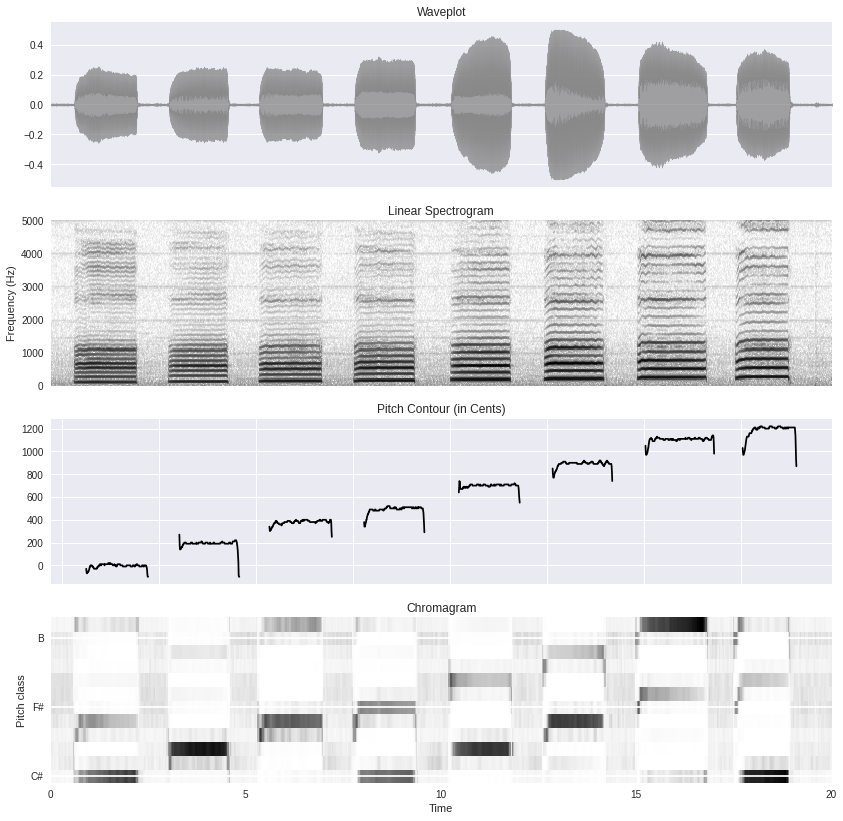

In [8]:
fig

In [9]:
fig.savefig('fullspecgrey.jpg')